In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [54]:
df = pd.read_csv("BNB-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...,...
1823,2024-02-26,388.535004,404.440094,382.256866,401.643890,401.643890,2011146388
1824,2024-02-27,401.643890,403.740051,390.917877,394.995636,394.995636,1750697179
1825,2024-02-28,394.951721,427.046814,394.661072,415.771606,415.771606,2323818531
1826,2024-02-29,415.583618,419.779022,392.379883,399.778717,399.778717,2058367303


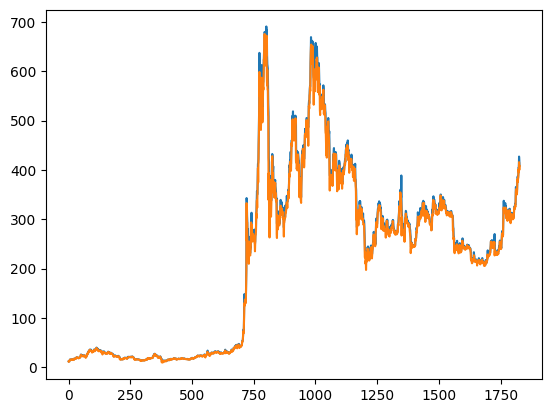

In [55]:
y = df[["Close"]]
X= df[["High"]]
plt.plot(X)
plt.plot(y)
plt.show()

<h1>Tỉ lệ Train Test 7:3

In [56]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [57]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=700,colsample_bytree=0.5, learning_rate=0.05, max_depth=3)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import math

mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.9106570404862757
MSE:  95.09603645241124
RMSE: 9.751719666418392
R_Square:  0.9460828196041072


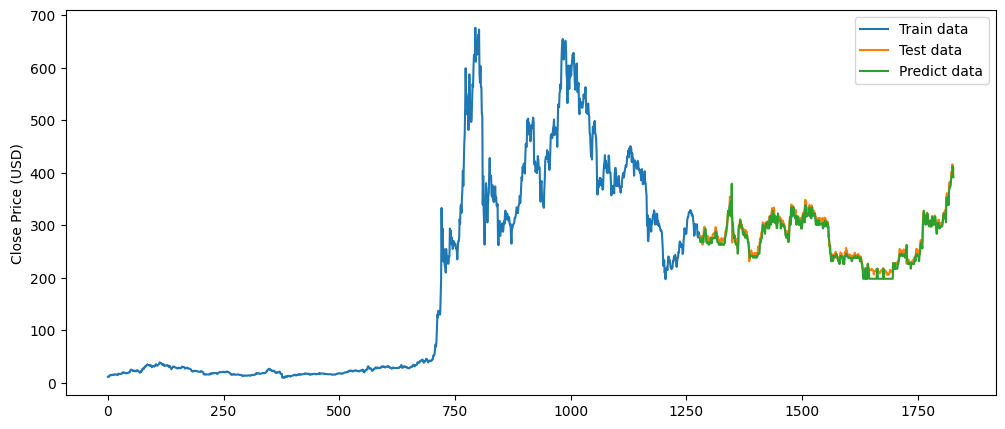

In [60]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [61]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [62]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

x_next_30_day

[array([391.18015], dtype=float32),
 array([385.31686], dtype=float32),
 array([372.13715], dtype=float32),
 array([360.11658], dtype=float32),
 array([338.53952], dtype=float32),
 array([333.7189], dtype=float32),
 array([318.76822], dtype=float32),
 array([309.1606], dtype=float32),
 array([300.87048], dtype=float32),
 array([292.68298], dtype=float32),
 array([280.74268], dtype=float32),
 array([267.81448], dtype=float32),
 array([255.62895], dtype=float32),
 array([244.93794], dtype=float32),
 array([238.2314], dtype=float32),
 array([231.42648], dtype=float32),
 array([227.70323], dtype=float32),
 array([217.00203], dtype=float32),
 array([197.90303], dtype=float32),
 array([197.90303], dtype=float32),
 array([197.90303], dtype=float32),
 array([197.90303], dtype=float32),
 array([197.90303], dtype=float32),
 array([197.90303], dtype=float32),
 array([197.90303], dtype=float32),
 array([197.90303], dtype=float32),
 array([197.90303], dtype=float32),
 array([197.90303], dtype=float

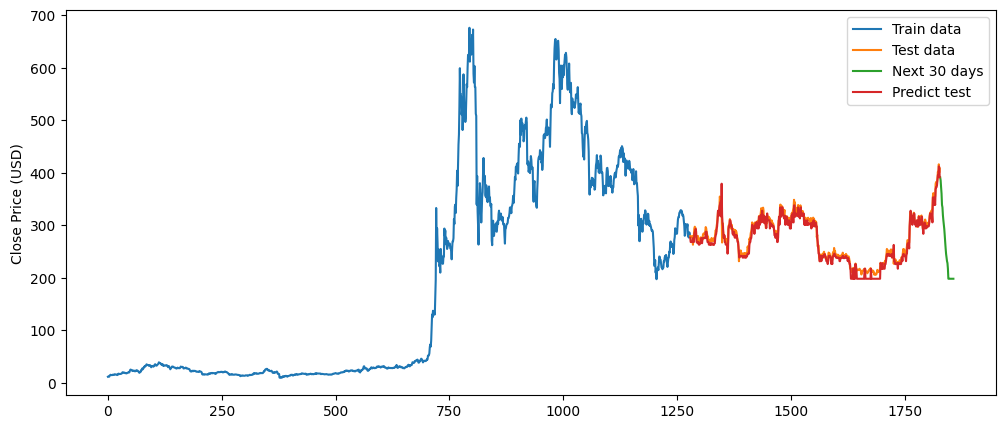

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict test')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

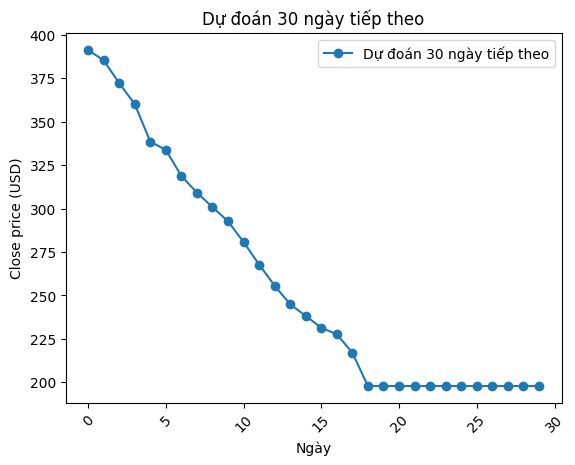

In [64]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [65]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [66]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

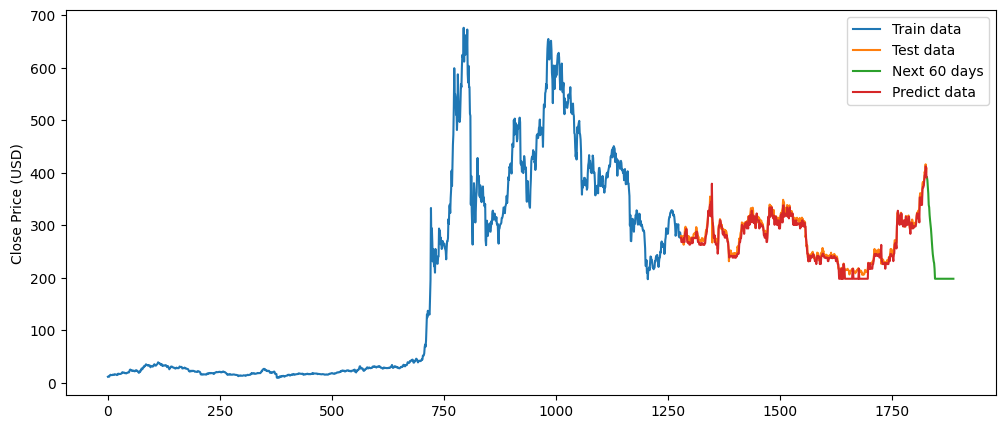

In [67]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

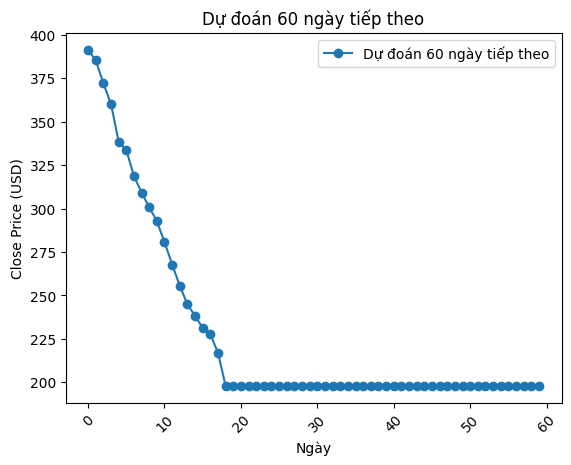

In [68]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [69]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [70]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

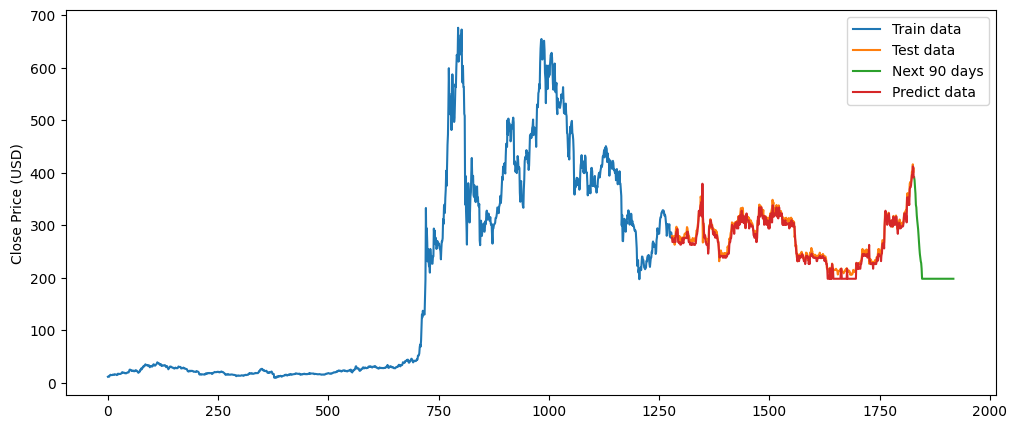

In [71]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

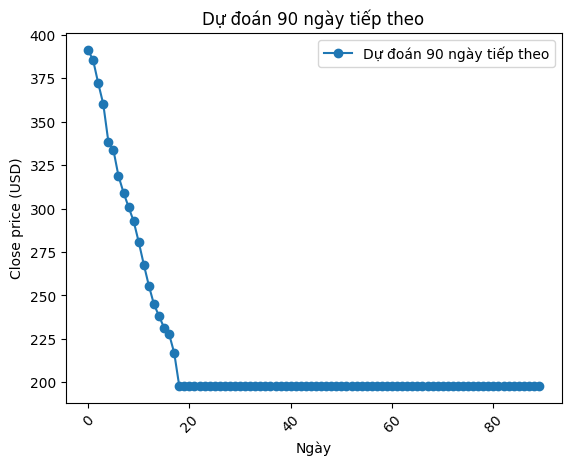

In [72]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

<h1>Tỉ lệ train test 8:2

In [73]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [75]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.586505547567252
MSE:  69.53085348892677
RMSE: 8.338516264235908
R_Square:  0.9694963348057841


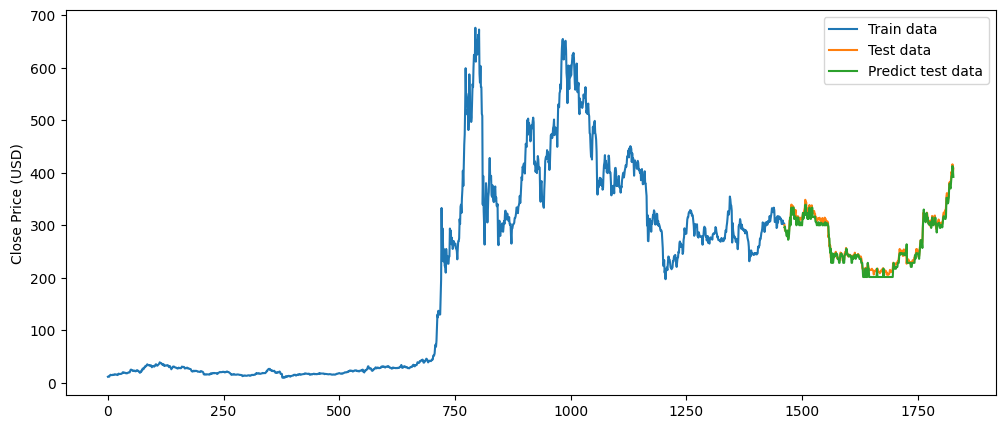

In [76]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [77]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [78]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

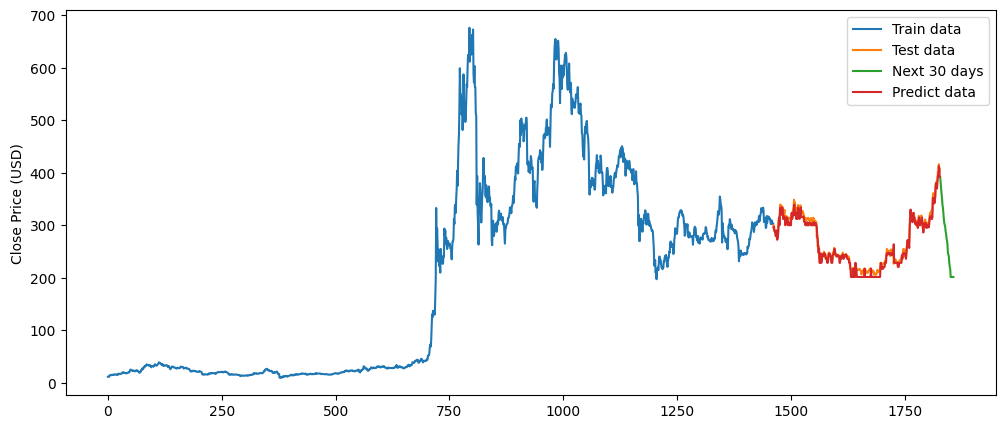

In [79]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

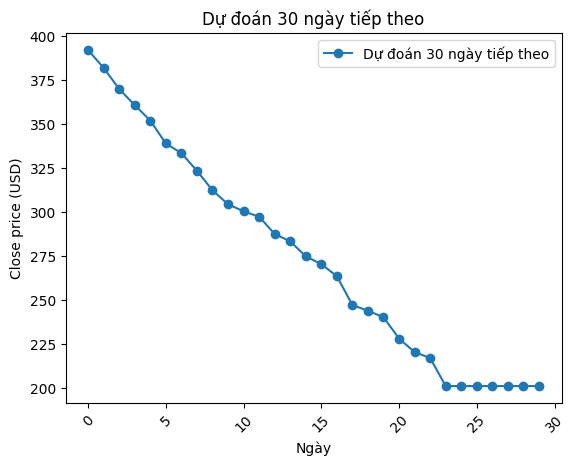

In [80]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [81]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [82]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

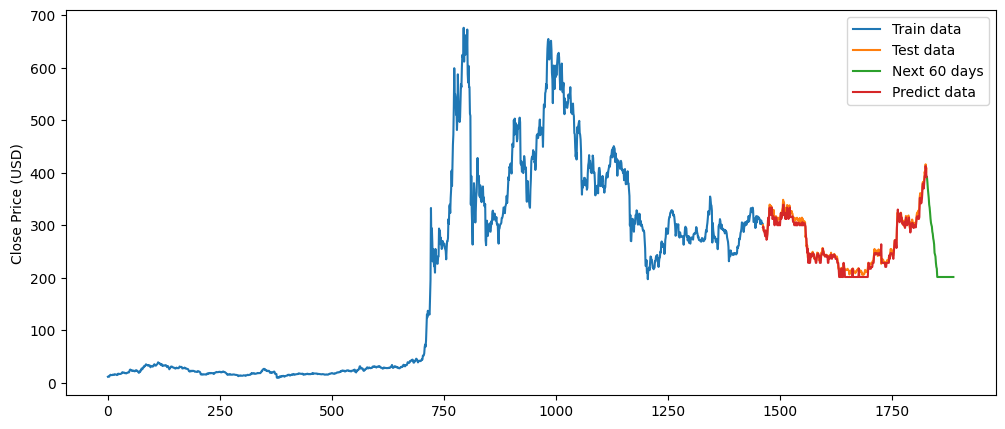

In [83]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

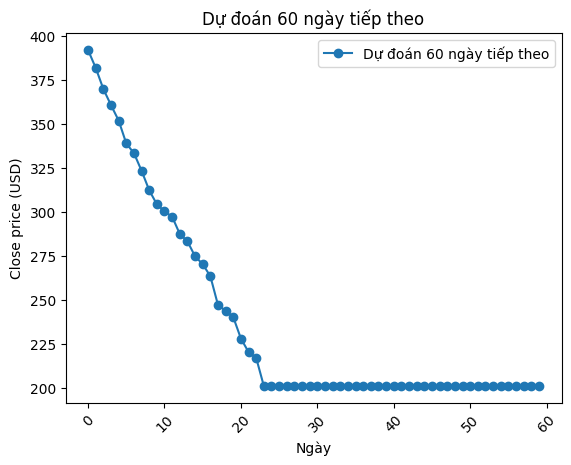

In [84]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [85]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [86]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

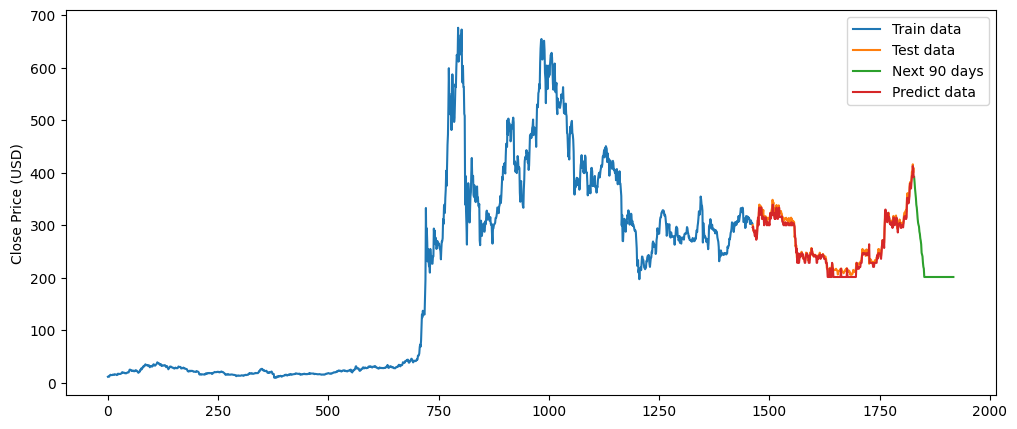

In [87]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

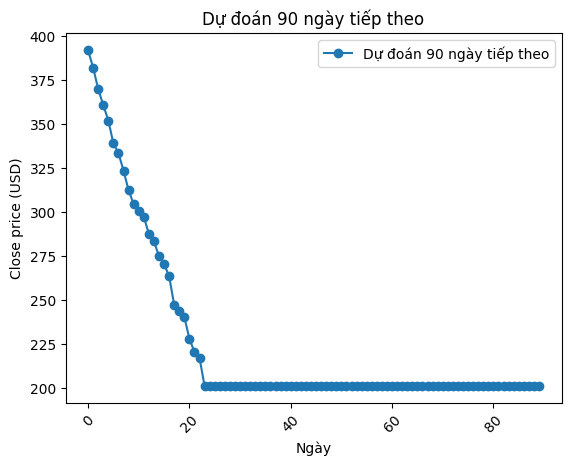

In [88]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

<h1>Tỉ lệ 9:1

In [89]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [91]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.176101152758016
MSE:  46.75516975991684
RMSE: 6.8377752054244105
R_Square:  0.983335136390948


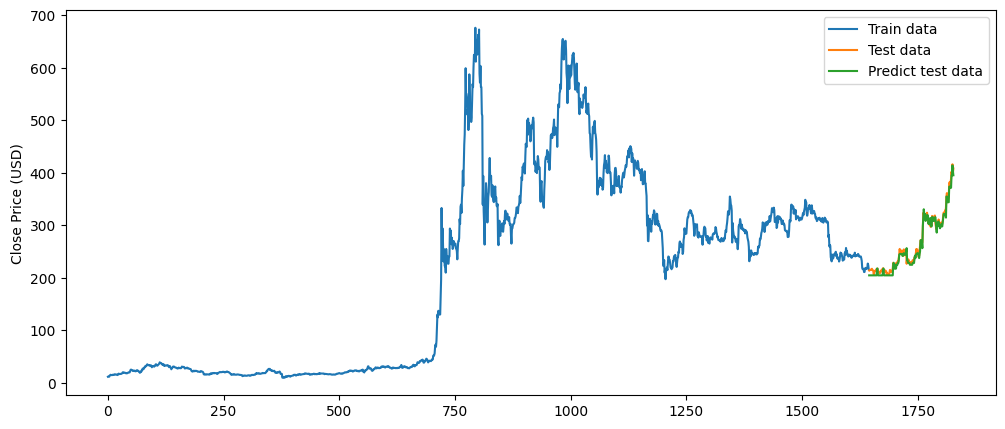

In [92]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [93]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [94]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

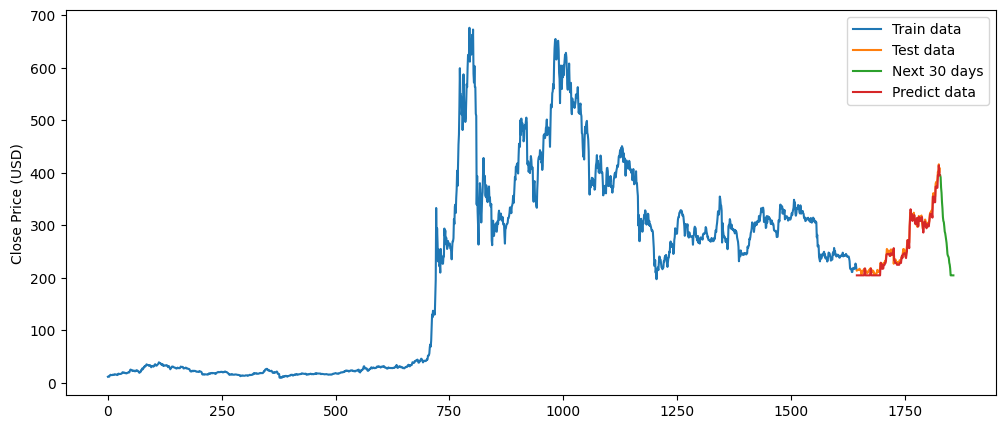

In [95]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30), x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

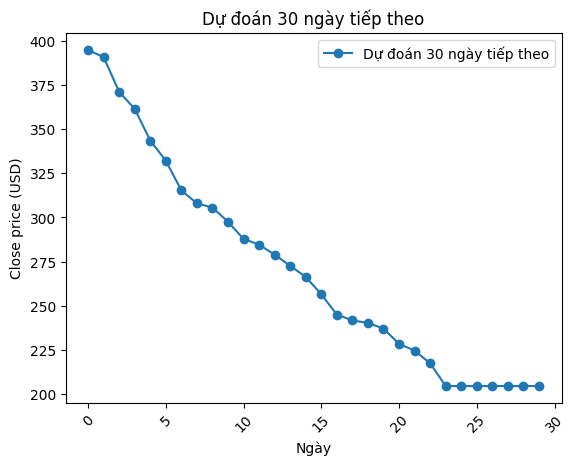

In [96]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [97]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [98]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

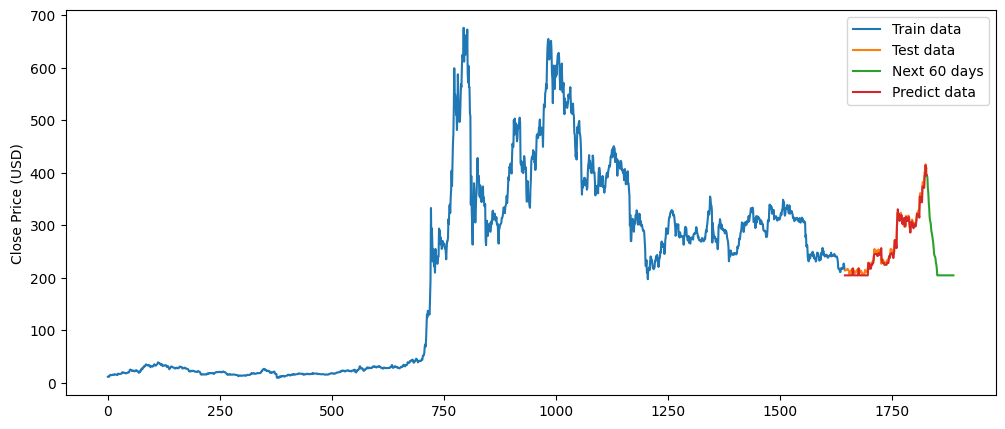

In [99]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

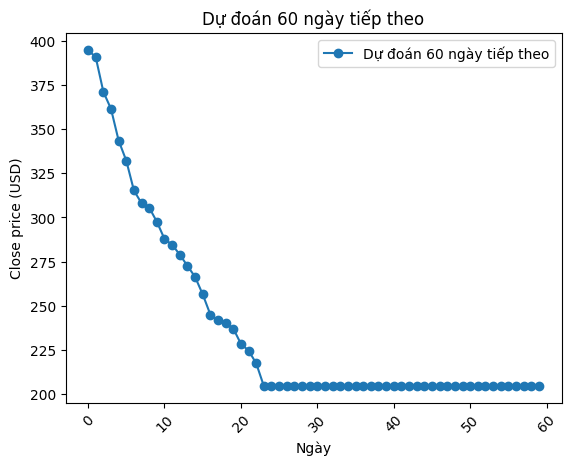

In [100]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [101]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[408.552795]])

In [102]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

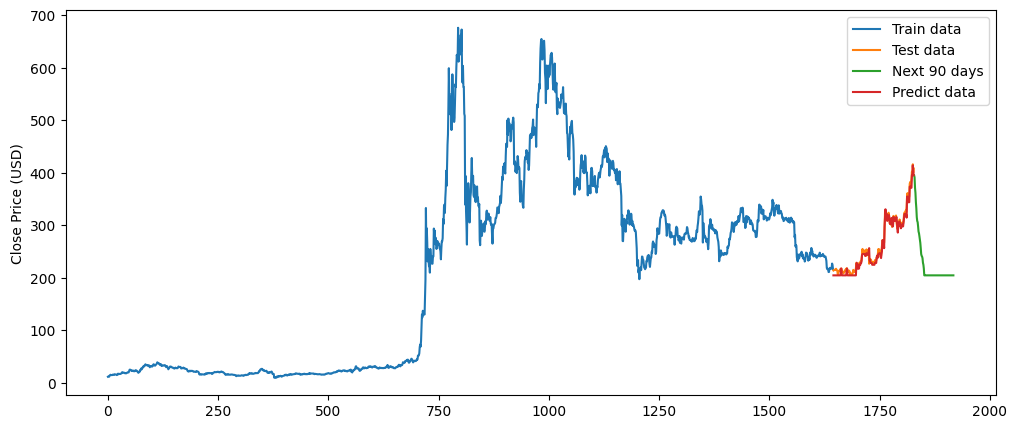

In [103]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

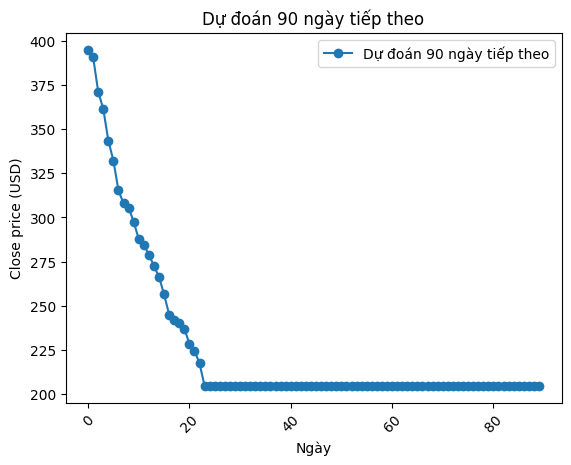

In [104]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()